In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import random

In [ ]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#adding 26 column names and reading the .txt file
dep_var=['RUL']
input_file_column_names=['e_id','cycle','oprsetting1','oprsetting2','oprsetting3','sensor1','sensor2','sensor3','sensor4','sensor5','sensor6','sensor7','sensor8','sensor9','sensor10','sensor11','sensor12','sensor13','sensor14','sensor15','sensor16','sensor17','sensor18','sensor19','sensor20','sensor21']
path="/content/drive/MyDrive/RUL_Dataset/train.txt"
train= pd.read_csv(path,delim_whitespace=True, names=input_file_column_names)
print('DATA SHAPE: ', train.shape)

DATA SHAPE:  (45918, 26)


In [ ]:
train['RUL']=''

In [ ]:
#method2- PIECEWISE LINEAR METHOD

MAX_LIFE=120
RUL = []
e_id = train['e_id'].unique()
for i in e_id:
  a = train[train['e_id']==e_id[i-1]]
  c = MAX_LIFE
  knee_point= len(a['cycle']) - MAX_LIFE
  for j in range(len(a['cycle'])):
    if j < knee_point:
      RUL.append(MAX_LIFE)
    else:
      c = c-1
      RUL.append(c)
train['RUL']= RUL


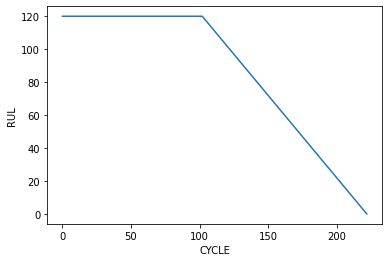

In [ ]:
a=train[train['e_id']==e_id[0]]
a['RUL'].plot(xlabel="CYCLE", ylabel="RUL")

In [ ]:
train=train.drop([ 'sensor10', 'sensor15', 'sensor16',  'oprsetting2'], axis=1)

In [ ]:
input_file_column_names=['e_id','cycle','oprsetting1','oprsetting2','oprsetting3','sensor1','sensor2','sensor3','sensor4','sensor5','sensor6','sensor7','sensor8','sensor9','sensor10','sensor11','sensor12','sensor13','sensor14','sensor15','sensor16','sensor17','sensor18','sensor19','sensor20','sensor21']
path="/content/drive/MyDrive/RUL_Dataset/final_test.txt"
test = pd.read_csv(path,delim_whitespace=True, names=input_file_column_names)
print('DATA SHAPE: ', test.shape)

DATA SHAPE:  (55156, 26)


In [ ]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
e_id,55156.0,221.334488,124.539458,1.0000,116.0000,223.00000,329.000000,435.0000
cycle,55156.0,77.962035,55.441894,1.0000,32.0000,68.00000,115.000000,298.0000
oprsetting1,55156.0,24.005642,14.774840,0.0000,10.0045,25.00140,41.998100,42.0080
oprsetting2,55156.0,0.571366,0.310471,0.0000,0.2506,0.70000,0.840000,0.8420
oprsetting3,55156.0,49.078976,32.503164,0.0000,20.0000,40.00000,80.000000,100.0000
sensor1,55156.0,472.860462,26.418984,445.0000,445.0000,462.54000,491.190000,518.6700
sensor2,55156.0,579.429345,37.336312,535.5100,549.4700,555.80000,607.250000,644.0800
sensor3,55156.0,1418.007963,106.056670,1245.5700,1351.5000,1367.07000,1498.120000,1607.6100
sensor4,55156.0,1202.571341,119.118778,1029.0300,1122.2600,1133.82000,1305.300000,1430.9500
sensor5,55156.0,8.028791,3.620938,3.9100,3.9100,7.05000,10.520000,14.6200


In [ ]:
test=test.drop([ 'sensor10', 'sensor15', 'sensor16',  'oprsetting2'], axis=1)

In [ ]:
test.head(5)


,e_id,cycle,oprsetting1,oprsetting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,...,sensor9,sensor11,sensor12,sensor13,sensor14,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,10.0047,20.0,489.05,605.02,1498.72,1304.90,10.52,15.49,...,8770.87,45.47,371.83,2388.12,8128.58,371,2319,100.0,28.52,17.0653
1,1,2,0.0015,100.0,518.67,642.69,1592.90,1405.35,14.62,21.61,...,9046.61,47.46,521.88,2388.09,8128.07,392,2388,100.0,38.95,23.3609
2,1,3,34.9986,60.0,449.44,555.49,1357.71,1127.52,5.48,8.00,...,8340.55,41.80,182.97,2387.92,8060.07,333,2223,100.0,14.91,8.8185
3,1,4,20.0031,0.0,491.19,607.62,1479.86,1257.25,9.35,13.65,...,8721.01,44.22,315.29,2388.09,8060.00,365,2324,100.0,24.35,14.7075
4,1,5,42.0041,40.0,445.00,549.69,1354.17,1124.17,3.91,5.72,...,8318.64,41.98,130.50,2387.84,8080.66,331,2212,100.0,10.67,6.4837


In [ ]:
ntest = test.copy()

# **NORMALISATION**

# Normalisation done to get all the columns in a particular range so that it is easier to train

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
ntrain = train.copy()

In [ ]:
ntrain.iloc[:,2:23] = scaler.fit_transform(ntrain.iloc[:,2:23])

In [ ]:
ntest.iloc[:,2:22] = scaler.fit_transform(ntest.iloc[:,2:22])

In [ ]:
ntest.describe().T

,count,mean,std,min,25%,50%,75%,max
e_id,55156.0,221.334488,124.539458,1.0,116.000000,223.000000,329.000000,435.0
cycle,55156.0,77.962035,55.441894,1.0,32.000000,68.000000,115.000000,298.0
oprsetting1,55156.0,0.571454,0.351715,0.0,0.238157,0.595158,0.999764,1.0
oprsetting3,55156.0,0.490790,0.325032,0.0,0.200000,0.400000,0.800000,1.0
sensor1,55156.0,0.378179,0.358613,0.0,0.000000,0.238089,0.626985,1.0
sensor2,55156.0,0.404526,0.343892,0.0,0.128581,0.186884,0.660772,1.0
sensor3,55156.0,0.476295,0.292942,0.0,0.292592,0.335598,0.697575,1.0
sensor4,55156.0,0.431781,0.296374,0.0,0.231962,0.260724,0.687376,1.0
sensor5,55156.0,0.384574,0.338089,0.0,0.000000,0.293184,0.617180,1.0
sensor6,55156.0,0.370042,0.342321,0.0,0.000629,0.208805,0.615094,1.0


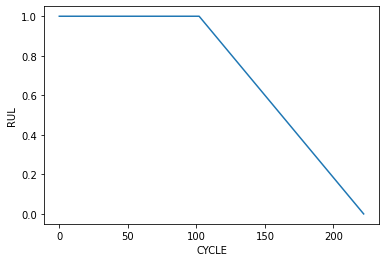

In [ ]:
a=ntrain[ntrain['e_id']==e_id[0]]
a['RUL'].plot(xlabel="CYCLE", ylabel="RUL")

In [ ]:
#splitting of data based on the engin id 70% train and 30% validation
trn = ntrain[ntrain['e_id'] < 154]
val = ntrain[ntrain['e_id'] >=154]

In [ ]:
ntest_cpy = ntest

In [ ]:
ntest_cpy = ntest_cpy.drop(['e_id','cycle'],axis = 1)


In [ ]:
ntest_cpy = ntest_cpy.to_numpy()

In [ ]:
X_train = trn.loc[:, trn.columns != 'RUL']
y_train = trn['RUL']
X_test = val.loc[:, val.columns != 'RUL']
y_test = val['RUL']

In [ ]:
X_train

,e_id,cycle,oprsetting1,oprsetting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,...,sensor9,sensor11,sensor12,sensor13,sensor14,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,0.238162,0.2,0.597937,0.629527,0.687972,0.679294,0.617180,0.615094,...,0.636321,0.754516,0.616179,0.992810,0.636065,0.684211,0.854123,1.0,0.630584,0.632556
1,1,2,0.000036,1.0,1.000000,0.978856,0.918452,0.906993,1.000000,1.000000,...,0.860702,0.909688,0.995815,0.992865,0.664509,0.926316,1.000000,1.0,0.988316,0.986910
2,1,3,0.833141,0.6,0.060269,0.181743,0.332422,0.225253,0.146592,0.144025,...,0.289205,0.468801,0.137030,0.992314,0.501429,0.326316,0.651163,1.0,0.158076,0.156259
3,1,4,0.476174,0.0,0.626985,0.656187,0.658153,0.532105,0.507937,0.499371,...,0.596691,0.660920,0.470803,0.992645,0.474167,0.642105,0.864693,1.0,0.487629,0.495685
4,1,5,0.999907,0.4,0.000000,0.127505,0.295344,0.229685,0.000000,0.000000,...,0.265306,0.458128,0.003044,0.992149,0.548277,0.284211,0.627907,1.0,0.026117,0.015798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32399,153,273,0.999964,0.4,0.000000,0.136146,0.317471,0.290116,0.000000,0.000629,...,0.273734,0.532020,0.002993,0.991764,0.536701,0.315789,0.627907,1.0,0.005155,0.006075
32400,153,274,0.595170,0.8,0.238089,0.015076,0.063375,0.066922,0.293184,0.208805,...,0.023703,0.070608,0.087819,0.001322,0.055872,0.084211,0.000000,0.0,0.126804,0.133424
32401,153,275,0.595287,0.8,0.238089,0.020132,0.084013,0.095090,0.293184,0.208805,...,0.020715,0.077997,0.088047,0.001350,0.052470,0.084211,0.000000,0.0,0.141581,0.138720
32402,153,276,0.833363,0.6,0.060269,0.194613,0.372288,0.280573,0.146592,0.144025,...,0.296696,0.513957,0.134975,0.992397,0.502941,0.357895,0.651163,1.0,0.149828,0.148392


In [ ]:
cpy = X_test.copy()

In [ ]:
X_train = X_train.drop(['e_id','cycle'],axis=1)
X_test = X_test.drop(['e_id','cycle'],axis=1)

In [ ]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train= y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
cpy = cpy.to_numpy()

# **ARTIFICIAL NEURAL NETWORKS**





In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from tensorflow.keras.optimizers import RMSprop

In [ ]:
X_train.shape

(32404, 20)

In [ ]:
# Initialising the ANN
regressor = Sequential()

# Adding the input layer and the first hidden layer
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu',input_shape=(20,)))

In [ ]:
# Adding the second hidden layer
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))


# Adding the third hidden layer
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))

In [ ]:
# Adding the fourth hidden layer
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))


# Adding the fifth hidden layer
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))

In [ ]:
# Adding the output layer
regressor.add(Dense( 1, kernel_initializer = 'glorot_uniform', activation = 'linear'))

# Compiling the ANN
regressor.compile(optimizer = RMSprop(0.001), loss = 'mean_absolute_error', metrics = ['mean_absolute_error'])

In [ ]:

regressor.fit(X_train,y_train,epochs=50)

Epoch 1/50
1013/1013 [==============================] - 3s 2ms/step - loss: 0.2630 - mean_absolute_error: 0.2630
Epoch 2/50
1013/1013 [==============================] - 2s 2ms/step - loss: 0.1976 - mean_absolute_error: 0.1976
Epoch 3/50
1013/1013 [==============================] - 2s 2ms/step - loss: 0.1717 - mean_absolute_error: 0.1717
Epoch 4/50
1013/1013 [==============================] - 2s 2ms/step - loss: 0.1563 - mean_absolute_error: 0.1563
Epoch 5/50
1013/1013 [==============================] - 2s 2ms/step - loss: 0.1481 - mean_absolute_error: 0.1481
Epoch 6/50
1013/1013 [==============================] - 2s 2ms/step - loss: 0.1429 - mean_absolute_error: 0.1429
Epoch 7/50
1013/1013 [==============================] - 2s 2ms/step - loss: 0.1396 - mean_absolute_error: 0.1396
Epoch 8/50
1013/1013 [==============================] - 2s 2ms/step - loss: 0.1359 - mean_absolute_error: 0.1359
Epoch 9/50
1013/1013 [==============================] - 2s 2ms/step - loss: 0.1324 - mean_absolu

In [ ]:
#from sklearn.metrics import mean_squared_error, r2_score
y_hat=regressor.predict(X_test)
#r2_score(y_test,y_hat)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error as mae
R2_score = r2_score(y_test,y_hat)
MSE = mean_squared_error(y_test,y_hat)
from math import sqrt
RMSE=sqrt(mean_squared_error(y_test,y_hat))
MAE = mae(y_test,y_hat)
print("R2_Score:",R2_score)
print("MSE:",MSE)
print("RMSE:",RMSE)
print("MAE:",MAE)

R2_Score: 0.6107046132318663
MSE: 0.042871876406328724
RMSE: 0.20705524964687258
MAE: 0.13590090267018756


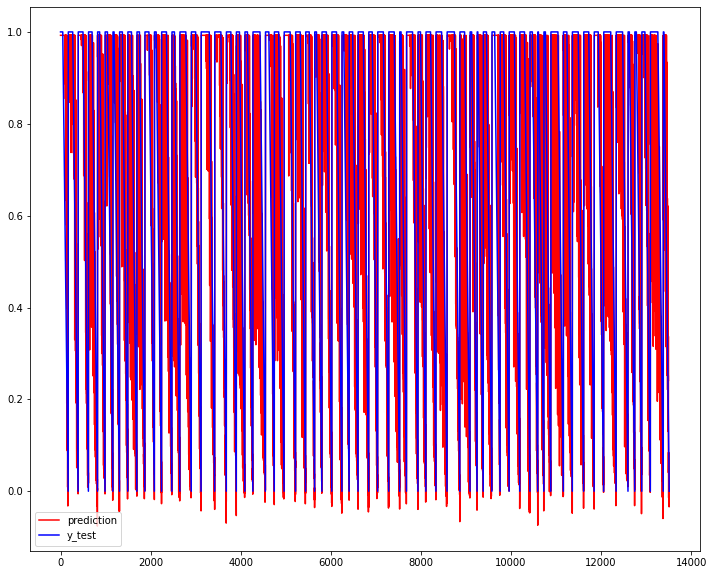

In [ ]:
fig = plt.figure(figsize=(12,10))
plt.plot(y_hat,c='red',label='prediction')
plt.plot(y_test,c='blue',label='y_test')
plt.legend()
plt.show()

In [ ]:
ncpy=pd.DataFrame(cpy,columns=['e_id','cycle','oprsetting1','oprsetting3','sensor1','sensor2','sensor3','sensor4','sensor5','sensor6','sensor7','sensor8','sensor9','sensor11','sensor12','sensor13','sensor14','sensor17','sensor18','sensor19','sensor20','sensor21'])
ncpy['y_test']=pd.DataFrame(y_test)
ncpy['y_pre']=pd.DataFrame(y_hat)

No handles with labels found to put in legend.


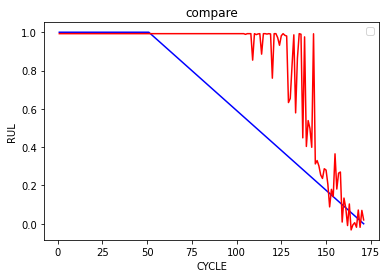

In [ ]:
a=ncpy[ncpy['e_id']==154]
plt.plot(a['cycle'],a['y_test'],color='blue')
plt.plot(a['cycle'],a['y_pre'],color='red')
plt.xlabel('CYCLE')
plt.ylabel('RUL') 
plt.title('compare')
plt.legend() 
plt.show()

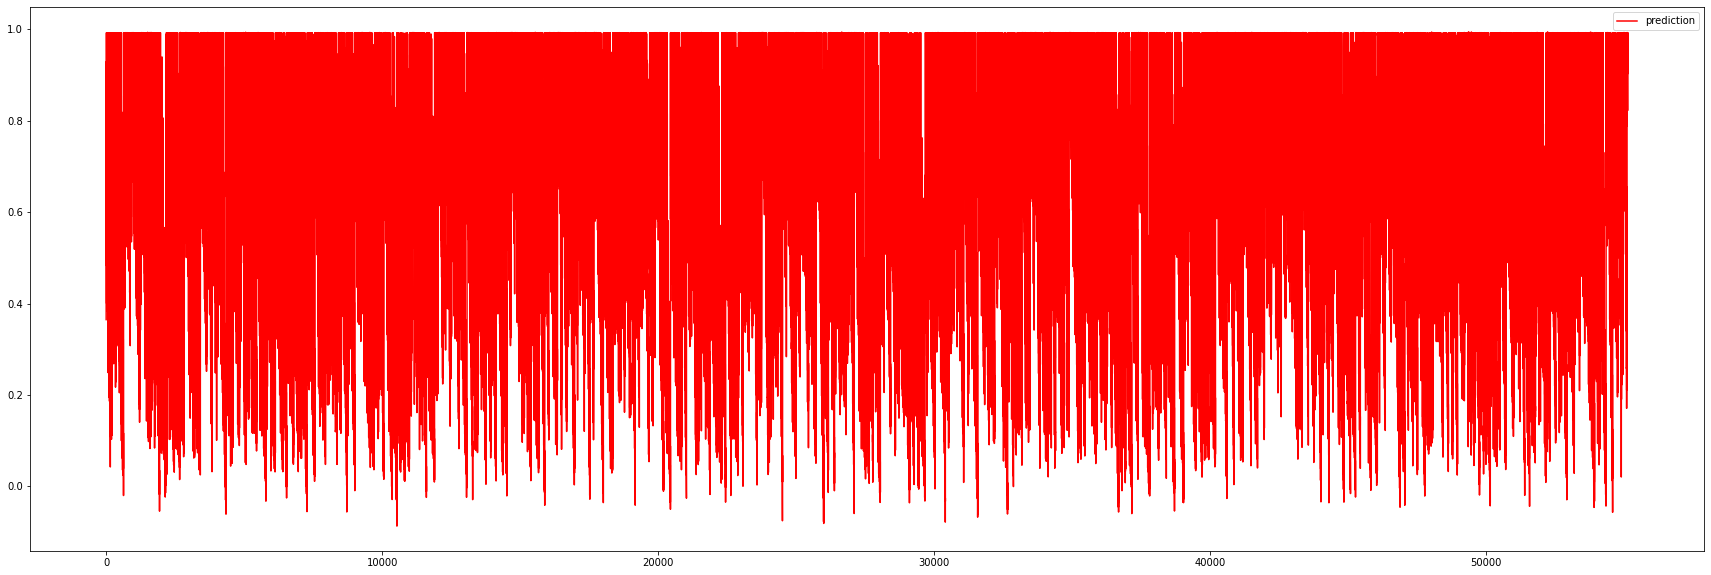

In [ ]:
Test_yprd = regressor.predict(ntest_cpy)
ntest['test_rul']=pd.DataFrame(Test_yprd)
fig = plt.figure(figsize=(30,10))
plt.plot(Test_yprd,c='red',label='prediction')
plt.legend()
plt.show()

No handles with labels found to put in legend.


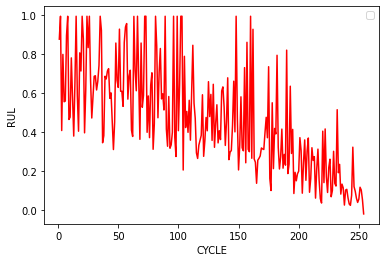

In [ ]:
a=ntest[ntest['e_id']==5]
plt.plot(a['cycle'],a['test_rul'],color='red')
plt.xlabel('CYCLE')
plt.ylabel('RUL') 
plt.legend() 
plt.show()

# **CONVOLUTIONAL NEURAL NETWORK**

In [ ]:
#import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, MaxPooling1D


In [ ]:
# X_train = X_train.to_numpy()


In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)


In [ ]:
model = Sequential()
model.add(Conv1D(32, 2, activation="relu", input_shape=(20,1)))
model.add(Flatten())


In [ ]:
model.add(Dense(64, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 19, 32)            96        
                                                                 
 flatten (Flatten)           (None, 608)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                38976     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 39,137
Trainable params: 39,137
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#model = Sequential()
#model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(20,1,1)))
#model.add(Conv1D(32, 2, activation="relu", input_shape=(20, 1)))
#model.add(Conv1D(32, 2, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))

#model.add(Conv2D(32, (3, 3), activation='relu'))

In [ ]:
#model.add(Dropout(0.25))
#model.add(Conv1D(64, 2, activation='relu'))
#model.add(Conv1D(64, 2, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))

In [ ]:
#model.add(Dropout(0.25))
#model.add(Flatten())
#model.add(Dense(64, activation="relu"))

In [ ]:
#model.add(Dense(1))
#model.compile(loss="mse", optimizer="adam")

In [ ]:
#model.summary()

In [ ]:
model.fit(X_train, y_train, batch_size=12,epochs=50, verbose=0)


In [ ]:
ypred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error as mae
R2_score = r2_score(y_test,ypred)
MSE = mean_squared_error(y_test,ypred)
from math import sqrt
RMSE=sqrt(mean_squared_error(y_test,ypred))
MAE = mae(y_test,ypred)
print("R2_Score:",R2_score)
print("MSE:",MSE)
print("RMSE:",RMSE)
print("MAE:",MAE)

R2_Score: 0.7480499260982908
MSE: 0.02774646912349089
RMSE: 0.16657271422262077
MAE: 0.12841680355316384


In [ ]:
#from sklearn.metrics import mean_squared_error, r2_score
#y_hat=regressor.predict(X_test)
#r2_score(y_test,ypred)

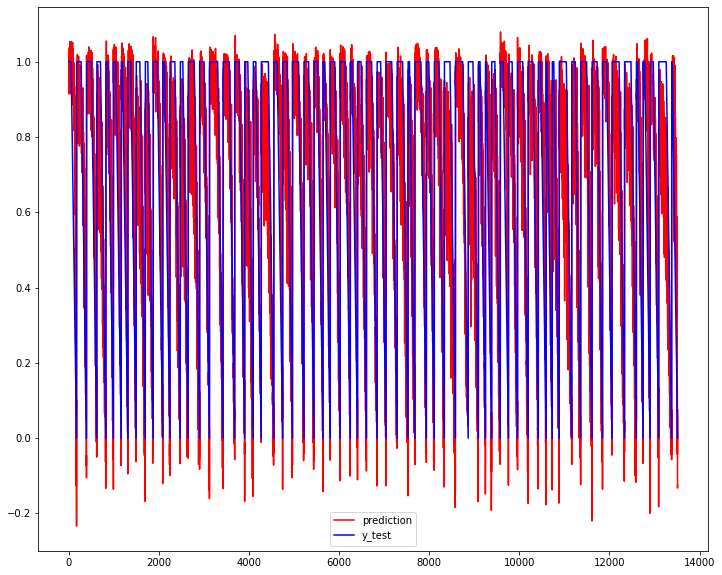

In [ ]:
fig = plt.figure(figsize=(12,10))
plt.plot(ypred,c='red',label='prediction')
plt.plot(y_test,c='blue',label='y_test')
plt.legend()
plt.show()

In [ ]:
ncpy=pd.DataFrame(cpy,columns=['e_id','cycle','oprsetting1','oprsetting3','sensor1','sensor2','sensor3','sensor4','sensor5','sensor6','sensor7','sensor8','sensor9','sensor11','sensor12','sensor13','sensor14','sensor17','sensor18','sensor19','sensor20','sensor21'])
ncpy['y_test']=pd.DataFrame(y_test)
ncpy['y__pre']=pd.DataFrame(ypred)

No handles with labels found to put in legend.


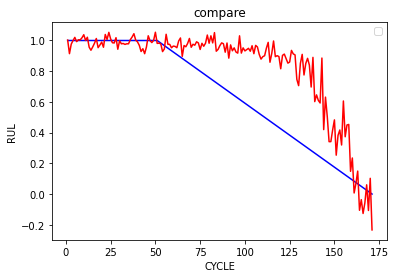

In [ ]:
a=ncpy[ncpy['e_id']==154]
plt.plot(a['cycle'],a['y_test'],color='blue')
plt.plot(a['cycle'],a['y__pre'],color='red')
plt.xlabel('CYCLE')
plt.ylabel('RUL') 
plt.title('compare')
plt.legend() 
plt.show()

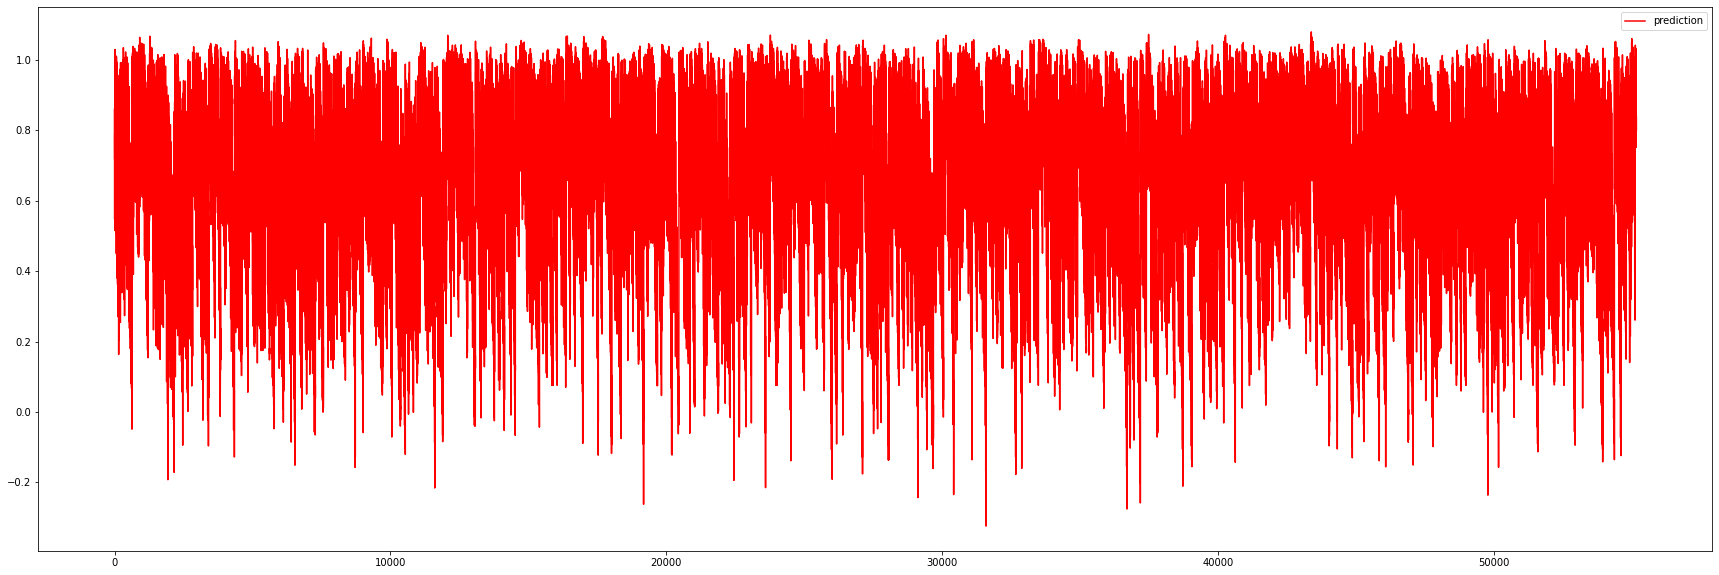

In [ ]:
Test_yprd = model.predict(ntest_cpy)
ntest['test_rul']=pd.DataFrame(Test_yprd)
fig = plt.figure(figsize=(30,10))
plt.plot(Test_yprd,c='red',label='prediction')
plt.legend()
plt.show()

No handles with labels found to put in legend.


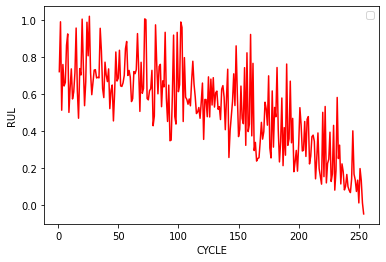

In [ ]:
a=ntest[ntest['e_id']==5]
plt.plot(a['cycle'],a['test_rul'],color='red')
plt.xlabel('CYCLE')
plt.ylabel('RUL') 
plt.legend() 
plt.show()